## Scheduling Method by Student Classification

/var/folders/sy/rsdlpkcs5491kzyzwzyw7ypc0000gn/T/ipykernel_7928/2255700889.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



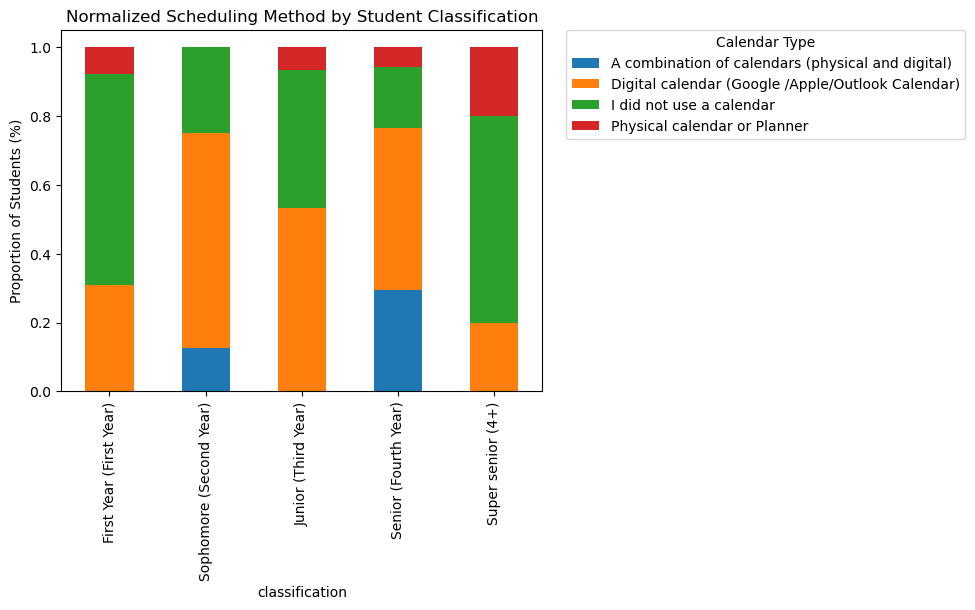

In [30]:
#Documentation: https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html

import pandas as pd 
import matplotlib.pyplot as plt

# 1. Renamed headings in Google Sheets. Legend can be written in the readme file on GitHub for doc purposes

df = pd.read_csv('cleaned_data_allresponses_asof12_29.csv') 

# what type of scheduling method do students use base on class? 
#ax = df.plot.bar(x='cal_type', y='classification', rot=0)


classification_order = ['First Year (First Year)', 'Sophomore (Second Year)', 'Junior (Third Year)', 'Senior (Fourth Year)', 'Super senior (4+)']
df['classification'] = pd.Categorical(df['classification'], categories=classification_order, ordered=True)
df_exploded = df.explode('cal_type') 


# Count occurrences of calendar types per classification
grouped_data = df_exploded.groupby(['classification', 'cal_type']).size().unstack(fill_value=0)

normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

ax = normalized_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.ylabel('Proportion of Students (%)')


plt.legend(
    title='Calendar Type',
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Position legend outside the plot (right side)
    borderaxespad=0  # Padding between legend and axis
)


plt.tight_layout()
plt.title("Normalized Scheduling Method by Student Classification")
plt.show()


## Web/Mobile Applications used for organizing meetups by classification


### Sankey/Alluvial diagram
Column variables used: 
- classification
- apps_used

Tutorials used: 
- https://www.geeksforgeeks.org/sankey-diagram-using-plotly-in-python/ 
- https://www.geeksforgeeks.org/getting-started-with-plotly-python/

In [21]:
import plotly.graph_objects as go
import pandas as pd

#### data prep

In [24]:
df = pd.read_csv('cleaned_data_allresponses_asof12_29.csv') 
sankeydata = df[["classification", "apps_used"]]
sankeydata.head()

,classification,apps_used
0,Senior (Fourth Year),Instagram
1,Senior (Fourth Year),Outlook
2,First Year (First Year),"Instagram, Facebook, Whatsapp"
3,Senior (Fourth Year),Instagram
4,Senior (Fourth Year),"Instagram, Facebook, Whatsapp, iMessage"


In [26]:
sankeydata = sankeydata.explode("apps_used")

/var/folders/sy/rsdlpkcs5491kzyzwzyw7ypc0000gn/T/ipykernel_7928/2116252149.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

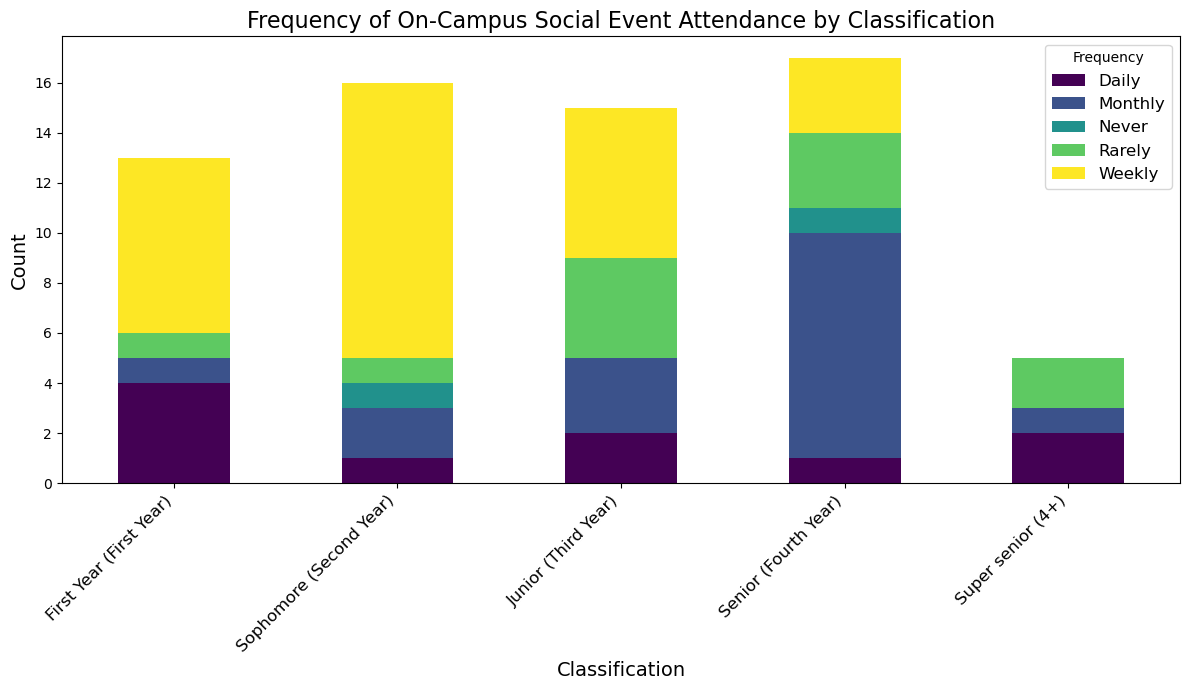

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df.groupby(["classification", "freq_social_oncampus"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="viridis")

plt.title("Frequency of On-Campus Social Event Attendance by Classification", fontsize=16)
plt.xlabel("Classification", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Frequency", fontsize=12)
plt.tight_layout()

plt.show()
